## **Task 1: The simplest encryption algorithm. (Marks: 5%)**
### A Caesar cypher is a weak form of encryption that involves “rotating” each letter by a ﬁxed number of places. To rotate a letter means to shift it through the alphabet, wrapping around to the beginning if necessary, so ’B’ rotated by 2 is ’D’ and ’Z’ rotated by 2 is ’B’. To rotate a word, rotate each letter by the same amount. For example, “cheer” rotated by 7 is “jolly”.

<font color = '#6FF'><b>Fun fact:</b></font> In the movie 2001: A Space Odyssey, the ship computer is called HAL, which is IBM rotated by -1.

Write a function called ceaser_cypher that takes a string and an integer as parameters, and returns a new string that contains the letters from the original string rotated by the given amount.

<font color = '#0F0'>**Hint:**</font> You might want to use the built-in function which converts a character to a numeric code, and converts numeric codes to characters.

<font color = '#FF0'>**Constraints:**</font> You will need to differentiate between upper and lowercase characters. For example, If 'A' is rotated by, it will become 'C' (upper-case), but if 'a' is rotated by 2, it will become 'c' (lower-case).

In [ ]:
#region Import Statements

# A collection for string constants.
import string

#endregion

#region User-Defined Functions

#region Data-Pre-Processing

def caesar_cipher_shift_cycle(is_decryption, shift) -> int:
  '''
  This method provides the shift-direction on which
  the encryption/decryption has to be performed.
  ---
  :param is_decryption:
  :param shift: The number of shifts/rotations done for each character.
  :type is_decryption: bool
  :type shift: int
  :return: Positive or negative number of given `shift` based on the value of the `is_decryption` argument provided.
  :rtype: int
  '''

  # Provides `shift` for performing encryption and `-shift` for decryption.
  return shift if not is_decryption else -shift

def caesar_cipher_pre_processing(data, shift, is_decryption = False) -> dict:
  '''
  This method performs pre-processing steps regarding
  the Caesar Cipher algorithm/method/technique
  for the given parameters.
  ---
  :param data: Considered the `plaintext` parameter as a type of string.
  :param shift: The number of shifts/rotations done for each character.
  :param is_decrpytion: True = Perform Encryption; False = Perform Decryption.
  :type is_decrpytion: bool
  :type data: str
  :type shift: int
  :return: Translation table for mapping encryption/decryption characters.
  :rtype: dict
  ---
  '''

  # Takes character-set (alphabets and digits) for performing encryption.
  alphabets_lower = string.ascii_lowercase
  alphabets_upper = string.ascii_uppercase
  digits = string.digits

  # Shifts all of the characters by `shift` parameter.
  # Example: shift = 3 -> from 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ' to 'defghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZabc'.
  shift_limit = caesar_cipher_shift_cycle(is_decryption, shift)
  shifted_alphabets_lower = alphabets_lower[shift_limit : ] + alphabets_lower[ : shift_limit] # For alphabets (lower).
  shifted_alphabets_upper = alphabets_upper[shift_limit : ] + alphabets_upper[ : shift_limit] # For alphabets (upper).
  shifted_digits = digits[shift_limit : ] + digits[ : shift_limit] # For digits.

  # str.maketrans() returns a translation table of unicodes for the given strings.
  # Example: Unicode/ASCII-code of A is 97 and the shifted string if 3 -> 97: 100.
  # NOTE: This returns a dictionary of unicode for each character.
  table_alphabets_lower = data.maketrans(alphabets_lower, shifted_alphabets_lower) # For alphabets (lower).
  table_alphabets_upper = data.maketrans(alphabets_upper, shifted_alphabets_upper) # For alphabets (upper).
  table_digits = data.maketrans(digits, shifted_digits) # For digits.

  # Combining dictionaries of alphabets and digits.
  table = table_alphabets_lower
  table.update(table_alphabets_upper)
  table.update(table_digits)

  return table

#endregion

#region Encryption & Decryption Methods

def encrypt_caesar_cipher(data, shift) -> str:
  '''
  This method encrypts the given `data` with the help of
  Caesar Cipher encryption algorithm/method/technique.
  ---
  NOTE: This algorithm only works with alphabets and digits but not with any other special characters.
  ---
  :param str data: Considered the `plaintext` parameter as a type of string.
  :param int shift: The number of shifts/rotations done for each character.
  :type data: str
  :type shift: int
  :return: Encrypted text using Caesar Cipher method/technique.
  :rtype: str
  ---
  '''

  # translate() replaces each character in `data` to given translation `table`.
  # Example: If shift = 3: Abc -> Def
  return data.translate(caesar_cipher_pre_processing(data = data, shift = shift))

def decrypt_caesar_cipher(data, shift) -> str:
  '''
  This method decrypts the given `data` with the help of
  Caesar Cipher decryption algorithm/method/technique.
  ---
  NOTE: This algorithm only works with alphabets and digits but not with any other special characters.
  ---
  :param str data: Considered the `plaintext` parameter as a type of string.
  :param int shift: The number of shifts/rotations done for each character.
  :type data: str
  :type shift: int
  :return: Encrypted text using Caesar Cipher method/technique.
  :rtype: str
  ---
  '''

  # translate() replaces each character in `data` to given translation `table`.
  # Example: If shift = 3: Def -> Abc
  return data.translate(caesar_cipher_pre_processing(data, shift, is_decryption = True))

#endregion

#endregion

#region Caesar Cipher Unit Testing

decrypt_caesar_cipher(data = encrypt_caesar_cipher(data = 'AaCcZz68', shift = 2), shift = 2)

#endregion

#region Assignment Task:

# Function Definition:
def caesar_cipher(message, rotation):
  return encrypt_caesar_cipher(data = message, shift = rotation)

# Function Execution:
caesar_cipher('Hello, world!', 3)

#endregion

'Khoor, zruog!'

## **Task 2: Binary Search Algorithm Implementation in Python. (Mark: 5%)**
### Binary search is one of the most common algorithms for finding items in sequential data types such as a list. Here is a good introduction and pseudo-code for this algorithm.

Write a function in Python that takes a list of integers, and a specific integer and uses binary search to find if the desired integer is present in the list. If the integer is present, the function will return True, otherwise, it will return False. Print the result value. And location of result value as well.
https://www.khanacademy.org/computing/computer-science/algorithms/binary-search/a/implementing-binary-search-of-an-array

In [ ]:
#region User-Defined Functions

#region Helping-Functions

def sort_numbers(numbers) -> list:
  '''
  Sorts the given `numbers` and provides a list of `numbers` in ascending order.
  ---
  NOTE: This algorithm is only limited to provide ascending order sorting because of the requirements of this task. However, this can be improved in the future by adding an optional field for describing the order of the list.
  ---
  :param numbers: List of integers.
  :type numbers: list
  :return: If the `numbers` are not of type integer or float, the list will be returned as it is, else a list having all the numbers in sorted (ascending) order.
  :rtype: list
  ---
  '''

  # Validator on whether all numbers are actually numbers.
  if all(type(number) in (int, float) for number in numbers):
    return numbers.sort() # Sort the given numbers in ascending order.
  return numbers # If all are not numbers, return the list as it is.

#endregion

#region Binary-Search Operation Approaches

def binary_search_recursion(numbers, search_item, lower_bound, upper_bound) -> tuple:
  '''
  Performing binary search operation on the given list of `numbers` to find the given `search_item` from it while updated `lower_bound` and `upper_bound` using recursion technique.
  ---
  :param numbers: List of "sorted" integer/float values.
  :param search_item: Item from the `numbers` to be searched.
  :param lower_bound: The lower-bound number required for the binary search operation.
  :param upper_bound: The upper-bound number required for the binary search operation.
  :type numbers: list
  :type search_item: int/float
  :type lower_bound: int
  :type upper_bound: int
  :return: A 1D tuple of size 2; first will be a boolean determinig the success of the operation, and second will be either the value of `mid` if found or `None` if not found.
  :rtype: tuple
  ---
  '''

  # Validator for Recursion Termination.
  if upper_bound >= lower_bound: # If the upper-bound is greater or equal to lower bound, that means the `search_item` is not present in the list of given `numbers`.
    mid = (lower_bound + upper_bound) // 2 # Evaluating the value of `mid` for performing the binary search operation.

    if numbers[mid] == search_item: # If the `search_item` is found at the evaluated `mid` position of given list of `numbers`, then we have found the number successfully at the `mid` index.
      return True, mid # Return the result with the index at which the number was found.

    # If we did not find the `search_item`, since this is a sorted list, we can squeeze this list into a smaller one by reducing the range to search.
    elif numbers[mid] > search_item: # Reduce the upper-bound limit if the `search_item` relies below `mid` position.
      return binary_search_recursion(numbers = numbers, search_item = search_item, lower_bound = lower_bound, upper_bound = mid - 1) # Performing binary search with reduced value of upper-bound.
    else: # Increase the lower-bound limit if the `search_item` relies above `mid` position.
      return binary_search_recursion(numbers = numbers, search_item = search_item, lower_bound = mid + 1, upper_bound = upper_bound) # Perfoming binary search with cut-down value of lower-bound.
  else: # When the `search_item` is found in the list of given `numbers`, terminate the recursion process.
    return False, None # Return the result with a `None` which denotes the number was not found.

def binary_search_iterative(numbers, search_item) -> tuple:
  '''
  Perfoming binary search operation on the given list of `numbers` to find the given `search_item` from it using iterative approach.
  ---
  :param numbers: List of "sorted" integer/float values.
  :param search_item: Item from the `numbers` to be searched.
  :type numbers: list
  :type search_item: int/float
  :return: A 1D tuple of size 2; first will be a boolean determinig the success of the operation, and second will be either the value of `mid` if found or `None` if not found.
  :rtype: tuple
  ---
  '''

  # Initializing lower and upper bounds for performing binary search operation.
  lower_bound = 0
  upper_bound = len(numbers) - 1

  # Iterating till the bounds are not sqeezed properly.
  while lower_bound <= upper_bound:
    mid = (lower_bound + upper_bound) // 2 # Evaluating the value of `mid` for performing the binary search operation.

    if numbers[mid] == search_item: # If the `search_item` is found at the evaluated `mid` position of given list of `numbers`, then we have found the number successfully at the `mid` index.
      return True, mid # Return the result with the index at which the number was found.

    else: # If we did not find the `search_item`, since this is a sorted list, we can squeeze this list into a smaller one by reducing the range to search.
      if numbers[mid] < search_item: # Increase the lower-bound limit if the `search_item` relies above `mid` position.
        lower_bound = mid # Perfoming binary search with cut-down value of lower-bound.
      else: # Reduce the upper-bound limit if the `search_item` relies below `mid` position.
        upper_bound = mid - 1 # Performing binary search with reduced value of upper-bound.

  return False, None # Return the result with a `None` which denotes the number was not found.

#endregion

def binary_search(numbers, search_item) -> tuple:
  '''
  Performing binary search operation on the given list of `numbers`, which might be unsorted, to find the given `search_item`.
  ---
  :param numbers: List of raw data.
  :param search_item: Value to be searched in the given `numbers`.
  :type numbers: list
  :type search_item: int/float
  :return: A 1D tuple of size 2; first will be a boolean determinig the success of the operation, and second will be either the value of `mid` if found or `None` if not found.
  :rtype: tuple
  ---
  '''

  # Initializing lower and upper bounds for performing binary search operation.
  lower = 0
  upper = len(numbers) - 1

  # Using the recursion methodology to perform the binary search operation.
  return binary_search_recursion(numbers = numbers, search_item = search_item, lower_bound = lower, upper_bound = upper)

#endregion

#region Unit Testing:

def binary_search_unit_testing():
  '''
  Method for performing unit testing on the above methods created for binary search.
  '''

  # Importing random module for generating random samples.
  import random

  # Defining the range for generating sample for this testing.
  min = 1
  max = 10000000

  random_numbers = random.sample(range(min, max + 1), max) # Generating random list of numbers for performing unit testing.
  search_element = random.randint(min, max) # Selected a random element from the given range for choosing random numbers.

  result = binary_search(numbers = random_numbers, search_item = search_element) # Performing the binary search operation and storing the result.

  # NOTE: This result is totally random and may vary at runtime.
  if result[0]: # If the result returned is True, the element is found successfully.
    print(f'Element { search_element } was found at index { result[1] }.') # Displaying the result.
  else: # If the result is False, the element was not found.
    print(f'Element { search_element } was not found.') # Displaying the result.

#endregion

# Performing Unit-Test on the task - Binary Search Operation.
binary_search_unit_testing()

Element 8210692 was not found.


## **Task 3: Formula Implementation. (Mark: 5%)**
### It is important to mention that as Python developers, you will need to convert a lot of mathematical formulas to Python codes. This specific part is dedicated to make sure you are able to just do that! The mathematician Srinivasa Ramanujan found an inﬁnite series that can be used to generate a numerical approximation of 1/π:

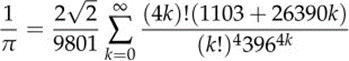

### **Write a function called estimate_pi that uses this formula to compute and return an estimate of π. It should use a while loop to compute terms of the summation until the last term is smaller than 1e-15, which is Python notation for 10−15.**
<font color = '#0F0'><b>Hint:</b></font> To implement factorial, you can use https://docs.python.org/3/library/math.html#math.factorial

In [ ]:
#region Import Statements

import math

#endregion

#region User-Defined Functions

def factorial(number) -> int:
  '''
  A recursive method for finding factorial number of the given `number`.
  ---
  NOTE: This method is not optimized for handling big numbers and finding their factorial so we might receive the memory limit exception if the value exceeds the memory limit of the system/resource.
  ---
  :param number: A number of which factorial is to be found.
  :type number: int
  :return: Factorial of the given `number`.
  :rtype: int
  :raises: ValueError
  ---
  '''

  # Validator.
  if (type(number) != int) or (number < 0): # If the given `number` is not a whole integer, throw an exception.
    raise ValueError('The given value is less than 0; this formula only allows whole numbers.') # Raising exception of ValueError.

  # Recursion Termination.
  if number == 0 or number == 1:
    return 1 # 1 is the factorial of values 0 and 1.

  # Recursion.
  return number * factorial(number - 1) # Find the factorial of the number using recursion method.

def srinivasa_ramanujan_formula(root, k) -> int:
  '''
  Evaluates the formula of Srinivasa Ramanujan to generate a numerical approximation of 1/π.
  ---
  :param root: Root value as calculated using the formula.
  :param k: Value of k in the formula.
  :type root: int
  :type k: int
  :return: Root value with the help of Srinivasa Ramanujan formula.
  :rtype: int
  ---
  '''

  # Evaluating the last-term
  last_term = ((2 * math.sqrt(2)) / 9801) \
              * (factorial(4 * k) * (1103 + (26390 * k))) \
              / ((factorial(k) ** 4) * (396 ** (4 * k)))
  root += last_term # Calculating the root value.

  # Recursion Terminator.
  if abs(last_term) < 1e-15: # |π| - Absolute value if less than 10-15.
    return root # Returning root value onces found its value.

  k += 1 # Filtering the value of k.

  # Recursion.
  return srinivasa_ramanujan_formula(root, k) # In reality, this computation takes only three loops.

def estimate_pi() -> float:
  '''
  Estimating the value of PI with the help of Srinivasa Ramanujan formula.
  ---
  :return: 1/π as per the formula of Srinivasa Ramanujan.
  :rtype: float
  ---
  '''

  # Values initialized for function required for the formula as 0 initially.
  root = 0
  k = 0

  # 1/π
  return 1 / srinivasa_ramanujan_formula(root, k)

#endregion

# Unit Testing:
print(estimate_pi()) # Output: 3.141592653589793
print(math.pi) # Why do such a complex programming where we already have this constant?

3.141592653589793
3.141592653589793


## **Task 4: Write down the following script: (Marks: 2.5)**
```
# Constant value
PENNY_VALUE = 1
NICKEL_VALUE = 5
DIME_VALUE = 10
QUARTER_VALUE = 25
PENNIES_IN_DOLLAR = 100

#user Input
numPennies = 0
numNickels = 0
numDimes = 0
numQuarters = 0
totalCentValue = 0.0
totalDollars = 0.0

# Get number of pennies, nickels, dimes, and
# quarters from the user.

#Sum the pennies,nicles,dimes and quarters to obtain total cent value
# Calculate the total cent value in dollars
totalDollars=TotalCentValue /Pennies_IN_Dollar
# Determine whether user won the game:
If totalDollars > 1.0# The amount was more than one dollar.
    Print 'Sorry, the amount you entered was more than one dollar.'
If totalDollars < 1.0 # The amount was less than one dollar.
    print'Sorry, the amount you entered was less than one dollar.'
otherwise # The amount was exactly one dollar.
    print'Congratulations!'
    print 'The amount you entered was exactly one dollar!'
    print 'You win the game!
```

In [ ]:
#region Constant Values:

PENNY_VALUE = 1
NICKEL_VALUE = 5
DIME_VALUE = 10
QUARTER_VALUE = 25
PENNIES_IN_DOLLAR = 100

#endregion

#region User Inputs:

numPennies = 0
numNickels = 0
numDimes = 0
numQuarters = 0
totalCentValue = 0.0
totalDollars = 0.0

#endregion

#region Get number of pennies, nickels, dimes, and quarters from the user.

numPennies = int(input('Please enter the number of pennies you have: '))
numNickels = int(input('Please enter the number of nickels you have: '))
numDimes = int(input('Please enter the number of dimes you have: '))
numQuarters = int(input('Please enter the number of quarters you have: '))

#endregion

#region Evaluation

# Sum the pennies, nickles, dimes, and quarters to obtain total cent value.
totalCentValue = (numPennies * PENNY_VALUE) \
                 + (numNickels * NICKEL_VALUE) \
                 + (numDimes * DIME_VALUE) \
                 + (numQuarters * QUARTER_VALUE)

# Calculate the total cent value in dollars.
totalDollars = totalCentValue / PENNIES_IN_DOLLAR

#endregion

#region Determine whether user won the game.

if totalDollars > 1.0: # The amount was more than a dollar.
  print('Sorry, the amount you have entered was more than one dollar.')
elif totalDollars < 1.0: # The amount was less than a dollar.
  print('Sorry, the amount you have entered was less than one dollar.')
else: # The amount was exactly one dollar.
  print('Congratulations!')
  print('The amount you have entered was exactly one dollar!')
  print('You have won the game!')

#endregion

Please enter the number of pennies you have: 15
Please enter the number of nickels you have: 1
Please enter the number of dimes you have: 3
Please enter the number of quarters you have: 2
Congratulations!
The amount you have entered was exactly one dollar!
You have won the game!


## **Task 5: Study the following flow chart and write down a script of Prime Number Generation using function. (Marks: 5)**

### The prime_or_composite function accepts an integer and displays a message indicating whether the value is a prime number or a composite number.

### Create a function named as given below `def prime_or_composite(n)`:

### Now define a main function as given below
```
def main():

# Get an integer from the user.
# Create an empty list.
# Populate the list with numbers.
For example
for i in range(2, user_num + 1):
        numbers.append(i)
# Determine whether each element is prime or composite using loop
```

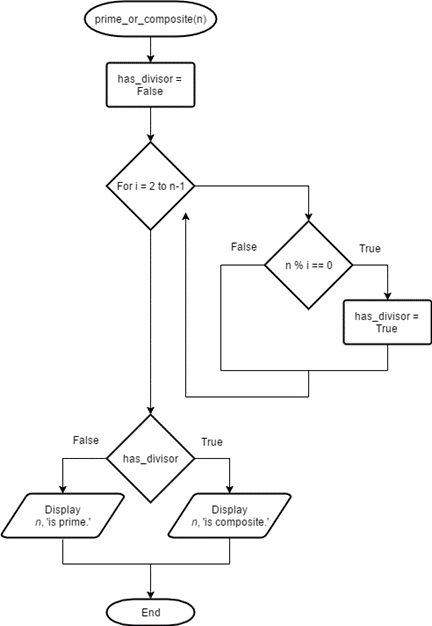
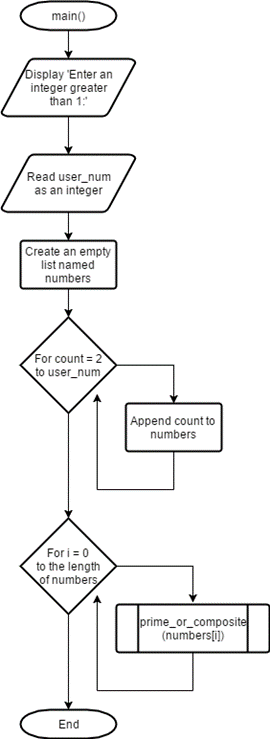

### **Output should be in following format:**

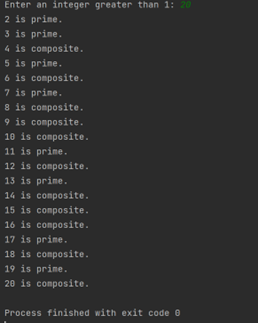
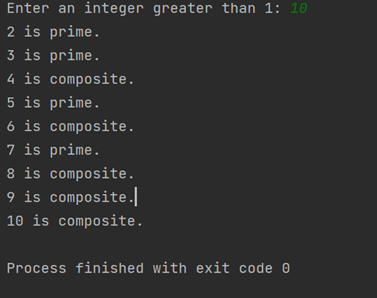

In [ ]:
def prime_or_composite(number) -> None:
  '''
  Calculates prime and composite numbers from 2 to `number`.
  ---
  :param number: Evaluating whether the given `number` is prime or composite.
  :type number: int
  :rtype: None
  ---
  '''

  # Used for determining whether the number would be prime or composite.
  has_divisor = False

  # Iterating till the given `number`.
  for i in range(2, number):
    if number % i == 0: # When number has more divisors.
      has_divisor = True # The number is composite.

  # Output based on the value of `has_divisor`.
  if has_divisor:
    print(f'{ number } is a composite number.') # Composite.
  else:
    print(f'{ number } is a prime number.') # Prime.

def main() -> None:
  '''
  Method for executing and determining the number of prime and composite numbers from a given range with user interaction.
  ---
  :rtype: None
  ---
  '''

  # Declaring the variable for storing user-input.
  user_num = 0

  try:
    # User-Input:
    user_num = int(input('Please enter a number (greater than 1): ')) # Taking the input as an integer.
  except ValueError:
    # Handling user-fault (human error) and giving another chance to improve.
    print(f'The input entered is inappropriate for our program. Please enter a proper value.')

    # Even though this recursive call can be eliminated by passing an argument for
    # restricting maximum recursive cycles.
    # This should not impact much for this program's requirement.
    main()

    # Returning because of recursive call because once finishing the child call,
    # the execution will continue from here
    # and move forward with the exceptional value of `user_num`.
    # So, it is necessary to terminate the code from here.
    return None

  # Preparing a list of numbers for iteratively call `prime_or_composite()` function.
  numbers = []

  # Validator.
  if user_num > 2: # Proceed when the user input lies in the range as expected from the user.
    numbers = list(range(2, user_num + 1))

    # Iterating for finding various prime and composite numbers.
    for number in numbers:
      prime_or_composite(number = number) # Finding prime and composite number for each `number` iteratively.
  else:
    # Raising an exception is necessary because the it is not what the program is meant for,
    # even though this can be handled by not generating an exception.
    raise ValueError(f'The value entered \'{ user_num }\' is invalid for our program!')

# Unit-Testing.
main()

Please enter a number (greater than 1): 26
2 is a prime number.
3 is a prime number.
4 is a composite number.
5 is a prime number.
6 is a composite number.
7 is a prime number.
8 is a composite number.
9 is a composite number.
10 is a composite number.
11 is a prime number.
12 is a composite number.
13 is a prime number.
14 is a composite number.
15 is a composite number.
16 is a composite number.
17 is a prime number.
18 is a composite number.
19 is a prime number.
20 is a composite number.
21 is a composite number.
22 is a composite number.
23 is a prime number.
24 is a composite number.
25 is a composite number.
26 is a composite number.


## **Task 6: Print the following Square pattern with numbers. (Marks: 2.5)**
### **Pattern:**
```
1 2 3 4 5
2 2 3 4 5
3 3 3 4 5
4 4 4 4 5
5 5 5 5 5
```


In [ ]:
def square_pattern(max_limit) -> None:
  '''
  Method that generates a square-shaped pattern for numbers whose starting is sequencial but echos itself with its `max_limit`.
  ---
  Example:
    max_limit = 5
    Pattern:
    1 2 3 4 5
    2 2 3 4 5
    3 3 3 4 5
    4 4 4 4 5
    5 5 5 5 5
  ---
  :rtype: None
  ---
  '''

  # NOTE: The below algorithm does not work for the values of `max_limit` above 10 properly.
  for initial_iteration in range(1, max_limit + 1): # For Outer Numbers.
    for child_iteration in range(1, max_limit + 1): # For Increamental Numbers.
      print(initial_iteration if child_iteration <= initial_iteration else child_iteration, end = ' ') # Displaying based on lambda condition.
    print() # For new-line.

# Unit-Testing.
square_pattern(5)

1 2 3 4 5 
2 2 3 4 5 
3 3 3 4 5 
4 4 4 4 5 
5 5 5 5 5 
